In [2]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# to read file contain data and view some of it 
df = pd.read_csv("Wuzzuf_Jobs.csv")
df.head()


,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


In [4]:
# (1) Factorize the YearsExp feature and convert it to numbers in new col. 

In [5]:
# view YearsExp col and its count of each
df["YearsExp"].value_counts()


1-3 Yrs of Exp      414
3-5 Yrs of Exp      390
3+ Yrs of Exp       309
2+ Yrs of Exp       259
5+ Yrs of Exp       238
                   ... 
2-2 Yrs of Exp        1
1-10 Yrs of Exp       1
7-20 Yrs of Exp       1
9-14 Yrs of Exp       1
12-20 Yrs of Exp      1
Name: YearsExp, Length: 101, dtype: int64

In [6]:
df["YearsExp__fact"] =pd.factorize(df["YearsExp"])[0]

df.head()
# to handle with data by numbers 

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,YearsExp__fact
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4


In [7]:
# (2) Apply K-means for job title and companies. 

In [8]:
df["Factorize-Title"] =pd.factorize(df["Title"])[0]
df["Factorize-Company"] =pd.factorize(df["Company"])[0]
df.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,YearsExp__fact,Factorize-Title,Factorize-Company
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0,0,0
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1,1,1
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2,2,2
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3,3,0
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4,4,3


In [9]:
# to get the last 2 columns
data= df.iloc[: ,[-2,-1]]


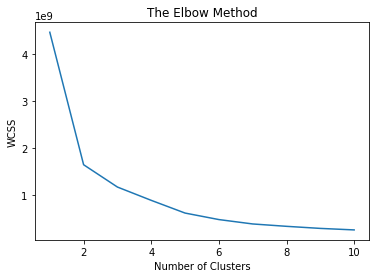

In [10]:
from sklearn.cluster import KMeans
wcss=[]                                                               # list to store values of wcss
for i in  range (1 ,11):                                              # 10 claster  
    k = KMeans(n_clusters = i ,init ='k-means++' ,random_state = 42)  # random_state: any number it will be used again 
    k.fit(data)                                                       # fit : function to return values , wcss one of these values
    wcss.append(k.inertia_)                                          # adding values of wscc for the list 
plt.plot(range(1,11) , wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [11]:
# the elbow=2  so we use 2 clasters

In [12]:
k =KMeans(n_clusters =2 , init ='k-means++' ,random_state = 42)
y_mean = k.fit_predict(data)
y_mean


array([1, 1, 1, ..., 0, 0, 0])

In [13]:
data['target'] = y_mean 
data.head() 


C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Factorize-Title,Factorize-Company,target
0,0,0,1
1,1,1,1
2,2,2,1
3,3,0,1
4,4,3,1


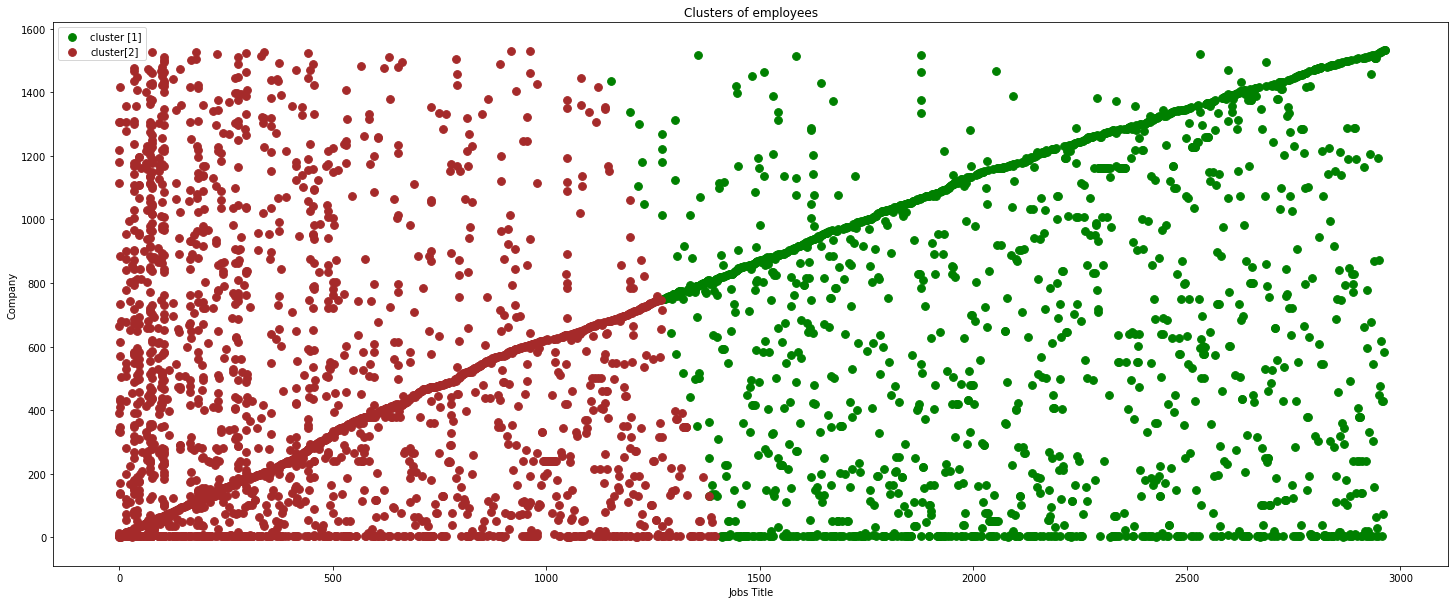

In [17]:
CLUSTER_0 = data.loc[data.target == 0]
 
CLUSTER_1 = data.loc[data.target == 1]
 
plt.figure(figsize =(25 ,10))
plt.scatter(CLUSTER_0.iloc[:,0] , CLUSTER_0.iloc[:,1] , color = 'green' , s=60 , label ='cluster [1]')
plt.scatter(CLUSTER_1.iloc[:,0] , CLUSTER_1.iloc[:,1] , color = 'brown' , s=60 ,label = 'cluster[2]')
plt.xlabel("Jobs Title")
plt.ylabel("Company")
plt.title("Clusters of employees")
plt.legend()
plt.show()
